In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Dark2")

results = pd.read_parquet("./sampling_scaling_rtt.gzip")
results["timing_model"] = results["timing_model"].astype(
    pd.CategoricalDtype(["empirical-low", "empirical-high", "theoretical-low", "theoretical-high"], ordered=True)
)
results["sampling_scheme"] = results["sampling_scheme"].astype(
    pd.CategoricalDtype(
        ['greedy',
         'ideal',
         'adaptive-empirical',
         'adaptive-empirical-low',
         'adaptive-empirical-high',
         'adaptive-theoretical',
         'adaptive-theoretical-low',
         'adaptive-theoretical-high',
         'adaptive-fitted-naive',
         'adaptive-constant-Q1-3.9s',
         'adaptive-constant-Q2-5.2s',
         'adaptive-constant-Q3-7.0s',
         'adaptive-power-empirical',
         'adaptive-power-empirical-low',
         'adaptive-power-empirical-high',
         'adaptive-power-theoretical',
         'adaptive-power-theoretical-low',
         'adaptive-power-theoretical-high',
         'adaptive-power-fitted-naive',
         'adaptive-power-constant-Q1-3.9s',
         'adaptive-power-constant-Q2-5.2s',
         'adaptive-power-constant-Q3-7.0s',
         'periodic-1.0s',
         'periodic-3.0s',
         'periodic-5.0s',
         'hold-1.0s',
         'hold-3.0s',
         'hold-5.0s'], ordered=True
        )
)

def _classify_sampling(s: str) -> str:
    ssplit = s.split("-")
    if len(ssplit) > 1:
        return ssplit[0]
    else:
        return "reference"

results["sampling_class"] = (
    results["sampling_scheme"]
    .apply(_classify_sampling)
    .astype(pd.CategoricalDtype(["reference", "adaptive", "periodic", "hold"]))
)

results

,rtt,step,previous_ttf,execution_time,step_duration,ttf,wait_time,samples,cumulative_duration,cumulative_samples,repetition,energy,cumulative_energy,timing_model,sampling_scheme,sampling_class
0,0.555556,1,0.555556,4.767165,5.791625,1.024460,0.468905,7,5.791625,7,5,0.140541,0.140541,empirical-high,adaptive-constant-Q1-3.9s,adaptive
1,0.555556,2,1.024460,5.158513,5.782207,0.623695,0.068139,6,11.573832,13,5,0.132733,0.273274,empirical-high,adaptive-constant-Q1-3.9s,adaptive
2,0.555556,3,0.623695,3.749709,4.757540,1.007832,0.452276,4,16.331373,17,5,0.102030,0.375304,empirical-high,adaptive-constant-Q1-3.9s,adaptive
3,0.555556,4,1.007832,6.452050,7.099829,0.647779,0.092223,7,23.431201,24,5,0.160164,0.535468,empirical-high,adaptive-constant-Q1-3.9s,adaptive
4,0.555556,5,0.647779,4.665980,5.748320,1.082340,0.526785,5,29.179521,29,5,0.124558,0.660026,empirical-high,adaptive-constant-Q1-3.9s,adaptive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511995,3.333333,96,4.494520,10.588283,18.333333,7.745051,4.411717,3,1085.000000,153,13,0.548000,30.198000,theoretical-low,periodic-5.0s,periodic
1511996,3.333333,97,7.745051,4.668883,8.333333,3.664450,0.331117,1,1093.333333,154,13,0.216000,30.414000,theoretical-low,periodic-5.0s,periodic
1511997,3.333333,98,3.664450,1.770731,8.333333,6.562602,3.229269,1,1101.666667,155,13,0.216000,30.630000,theoretical-low,periodic-5.0s,periodic
1511998,3.333333,99,6.562602,2.648078,8.333333,5.685255,2.351922,1,1110.000000,156,13,0.216000,30.846000,theoretical-low,periodic-5.0s,periodic


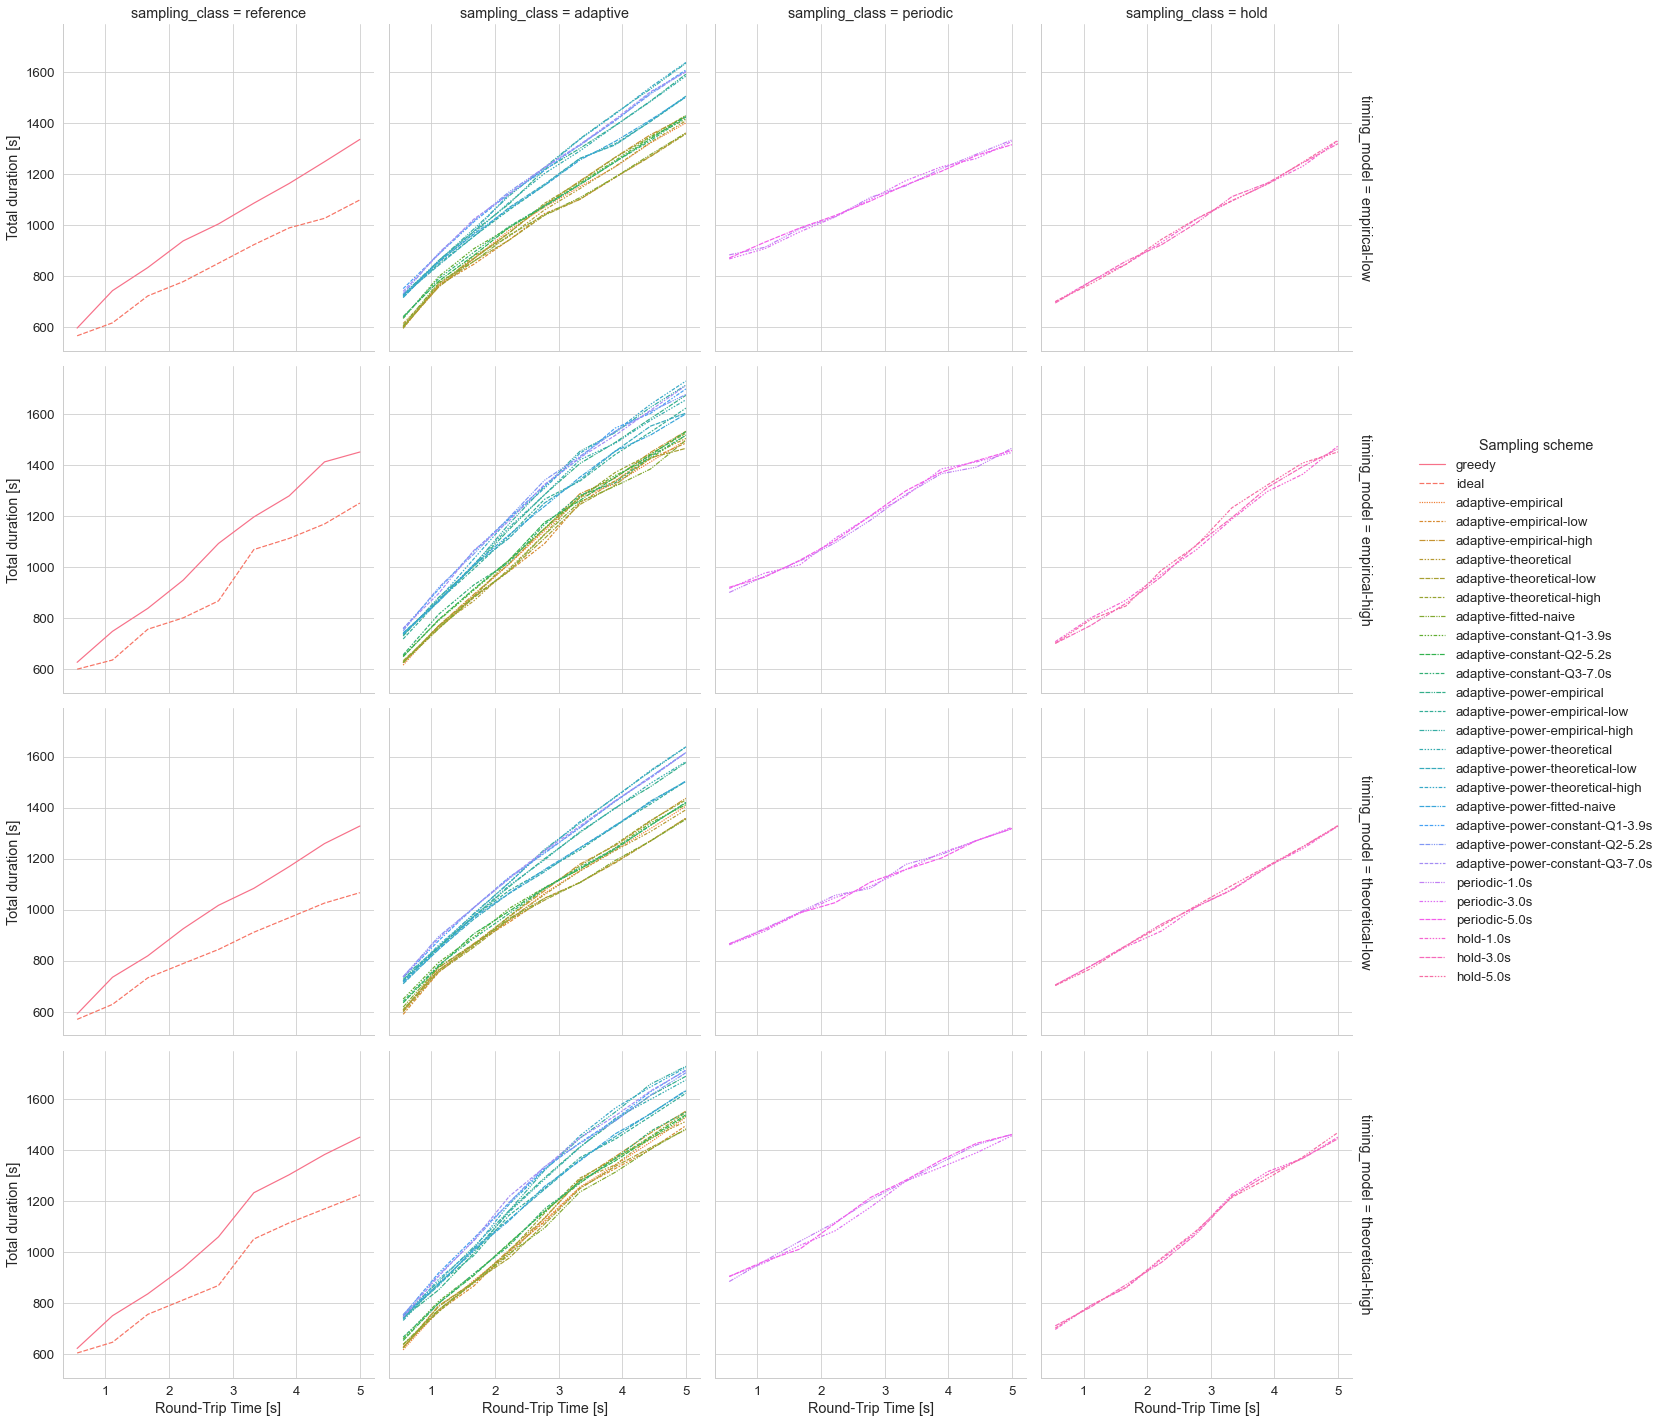

In [2]:
fg = sns.relplot(
    kind="line",
    data=results[results["step"] == results["step"].max()],
    x="rtt",
    y="cumulative_duration",
    hue="sampling_scheme",
    row="timing_model",
    col="sampling_class",
    errorbar=None,
    facet_kws={"margin_titles": True},
    # col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Total duration [s]")
fg.legend.set_title("Sampling scheme")
# fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

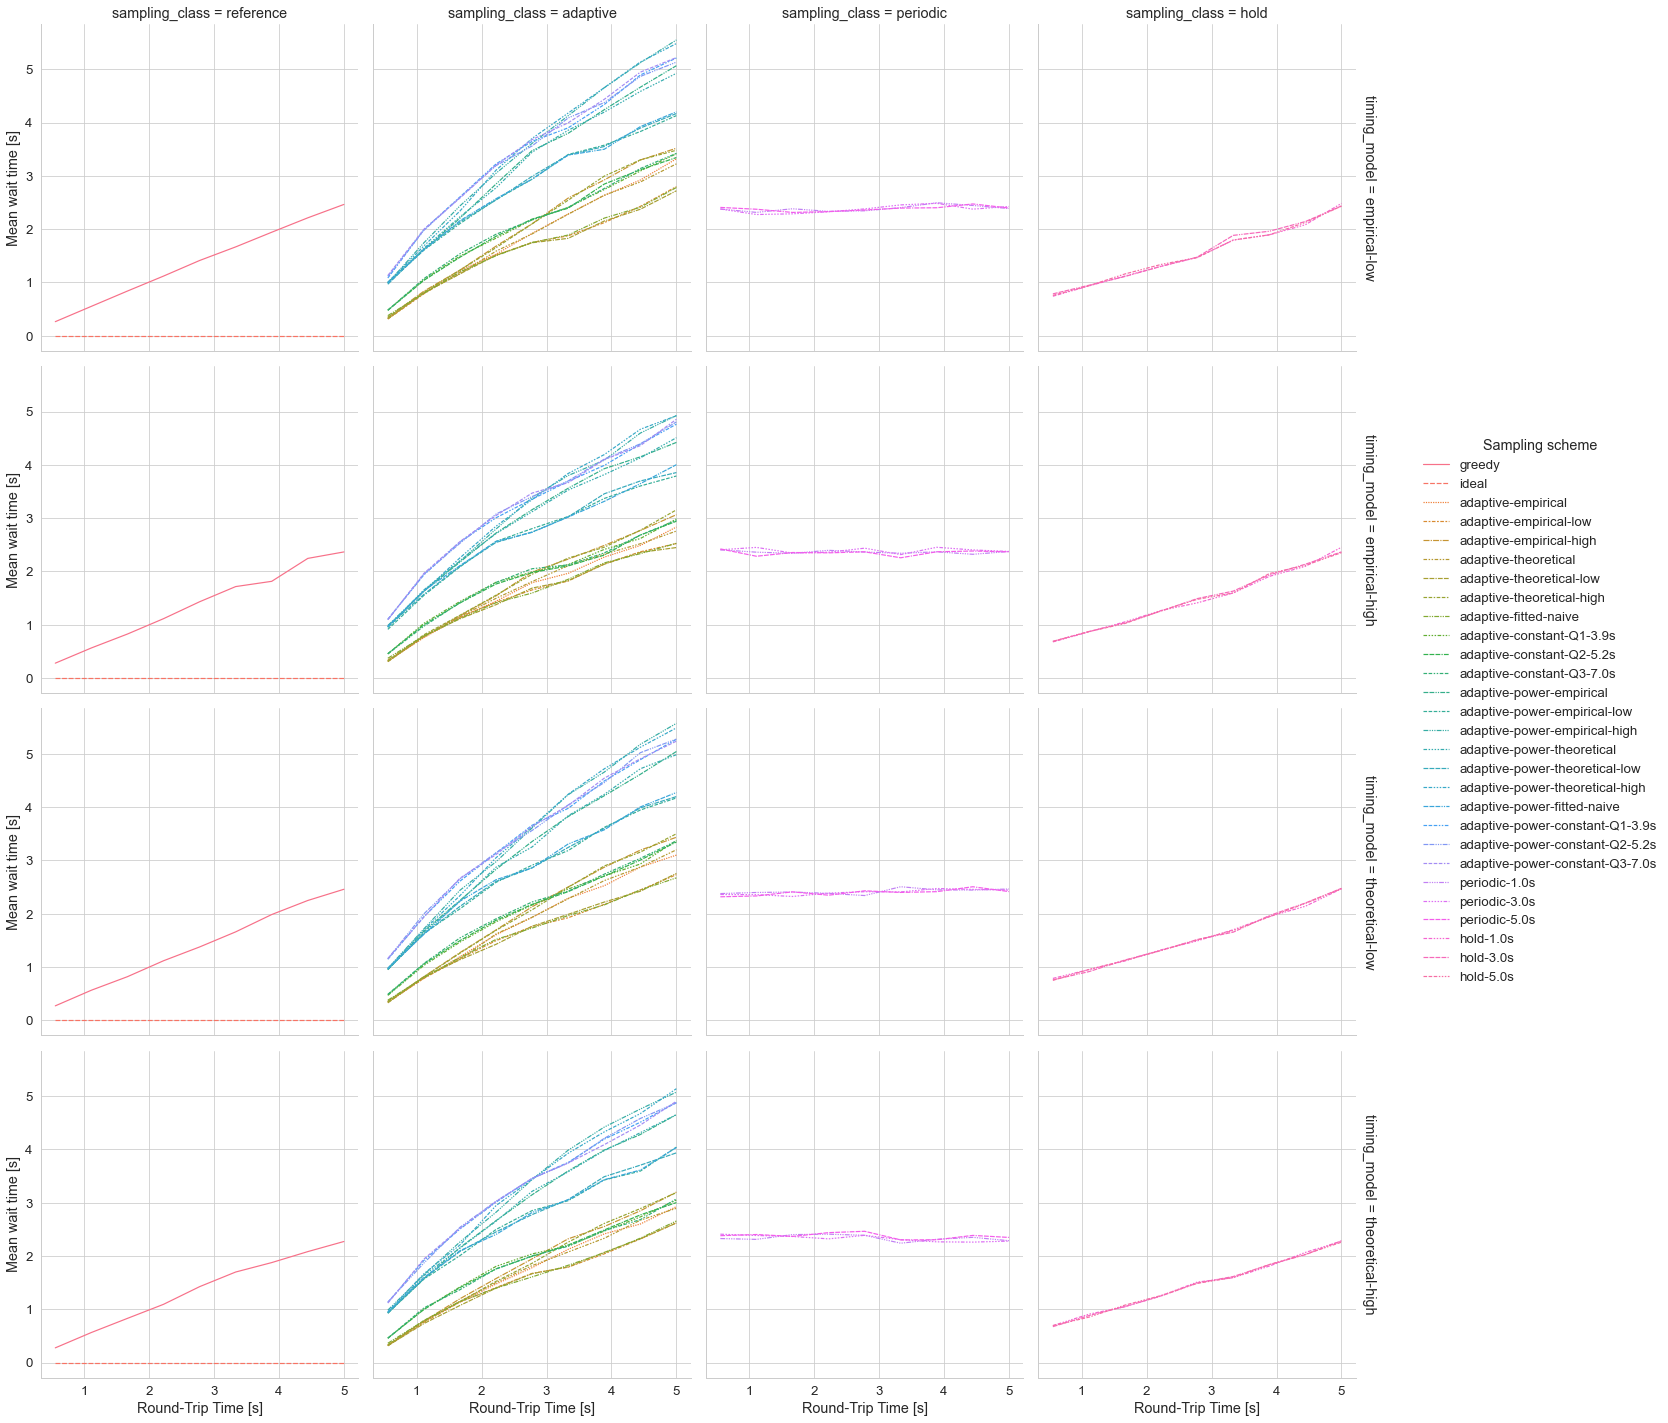

In [3]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="wait_time",
    hue="sampling_scheme",
    row="timing_model",
    col="sampling_class",
    errorbar=None,
    facet_kws={"margin_titles": True},
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean wait time [s]")
fg.legend.set_title("Sampling scheme")
# fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

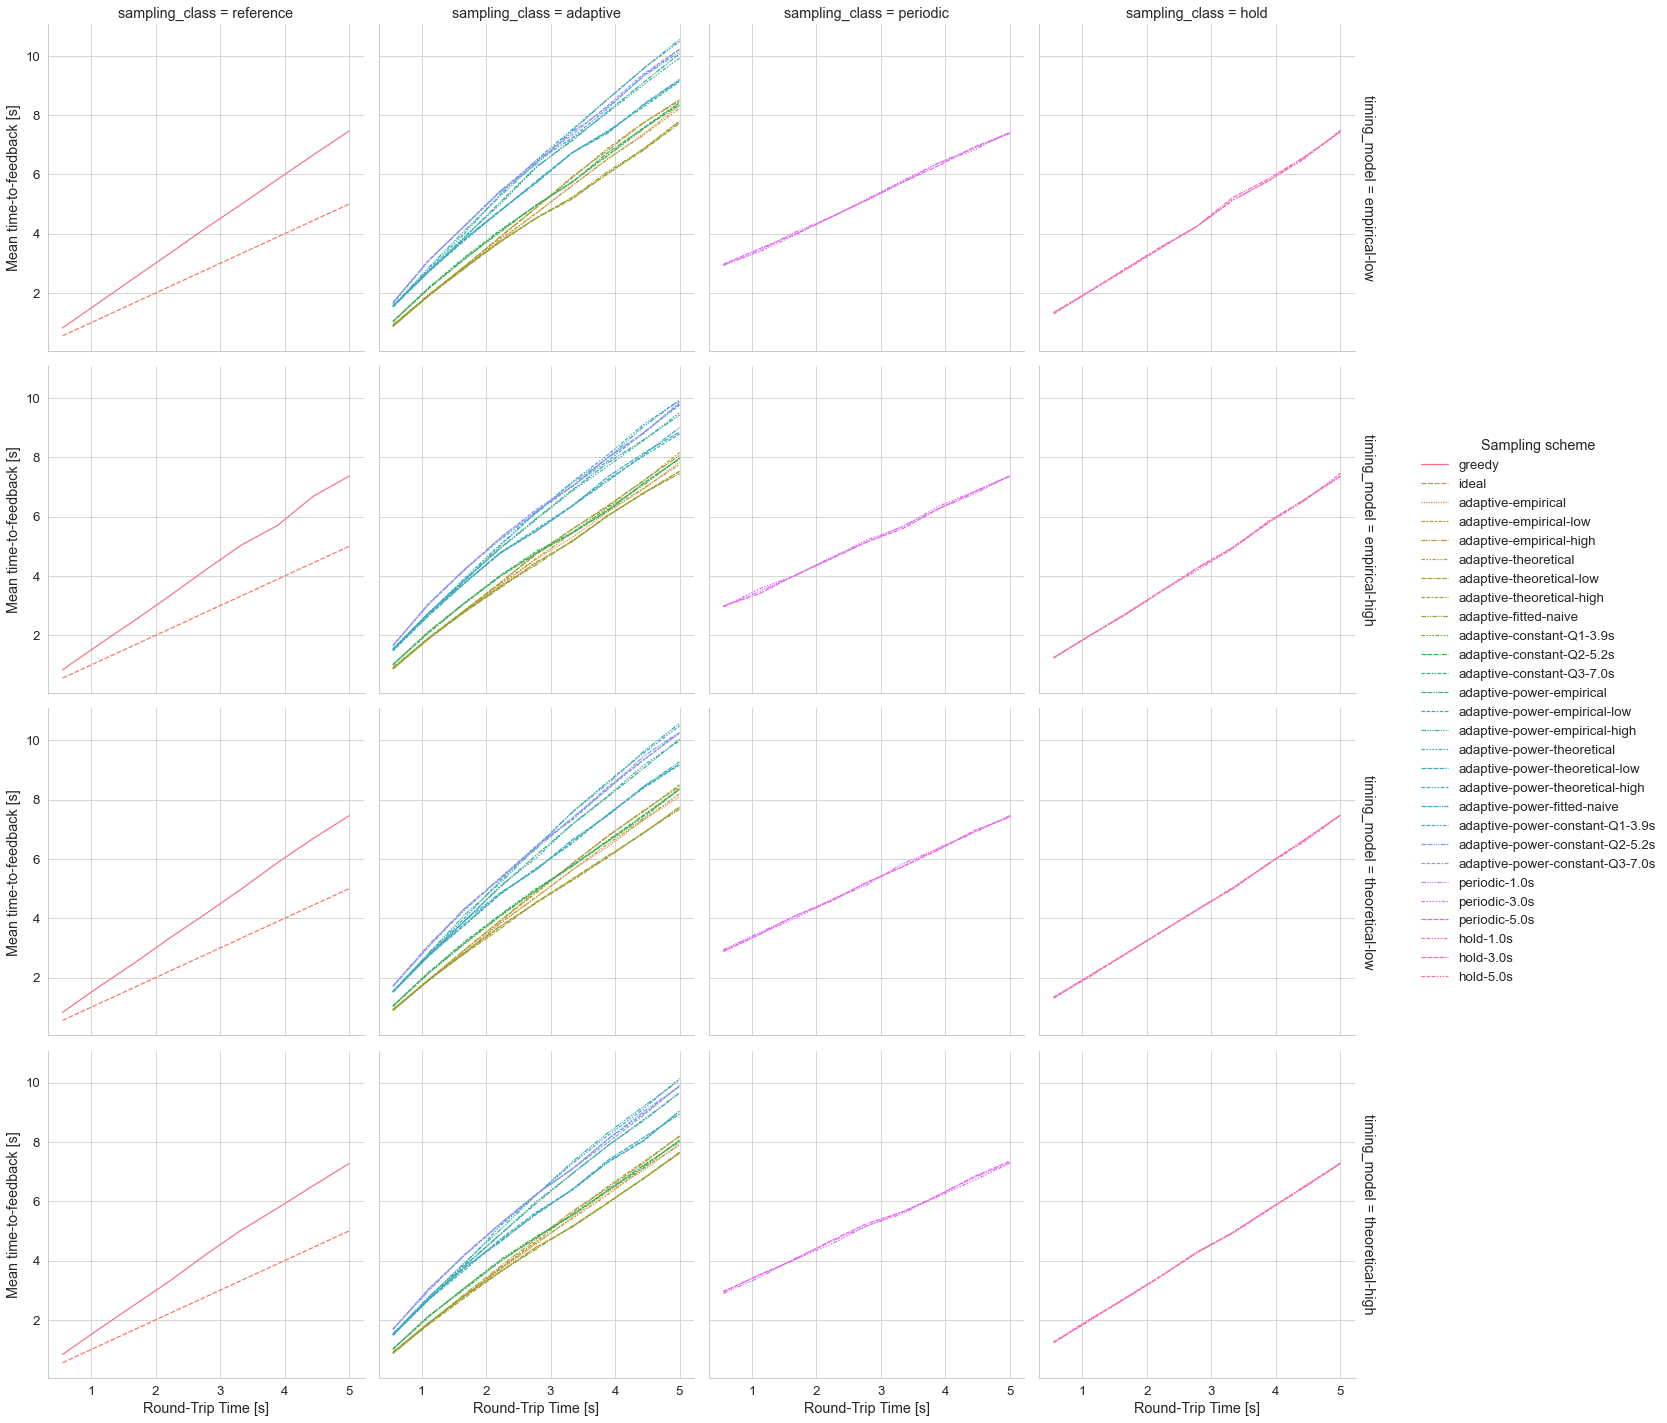

In [4]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="ttf",
    hue="sampling_scheme",
    row="timing_model",
    col="sampling_class",
    errorbar=None,
    facet_kws={"margin_titles": True},
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean time-to-feedback [s]")
fg.legend.set_title("Sampling scheme")
# fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

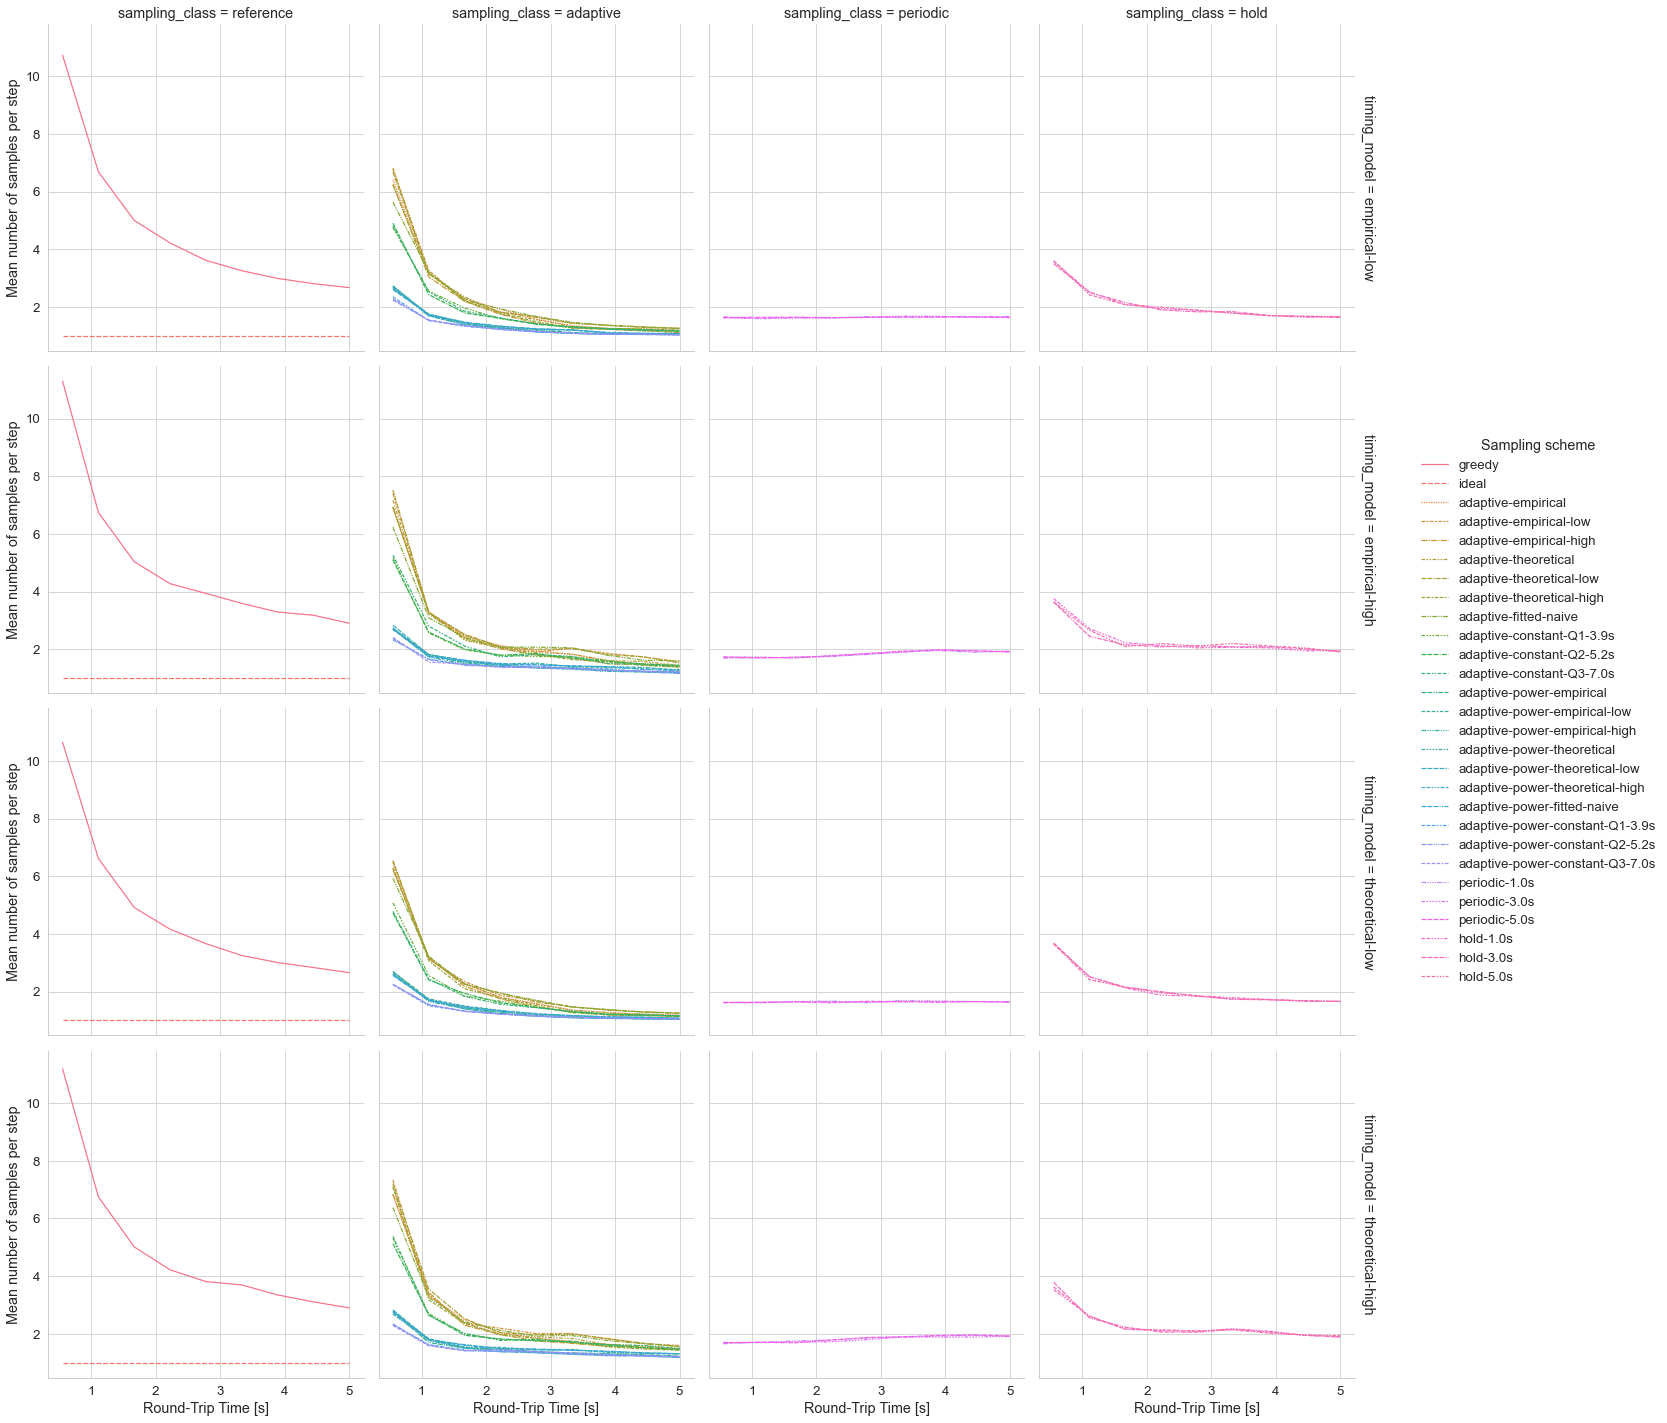

In [5]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="samples",
    hue="sampling_scheme",
    row="timing_model",
    col="sampling_class",
    errorbar=None,
    facet_kws={"margin_titles": True},
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean number of samples per step")
fg.legend.set_title("Sampling scheme")
# fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

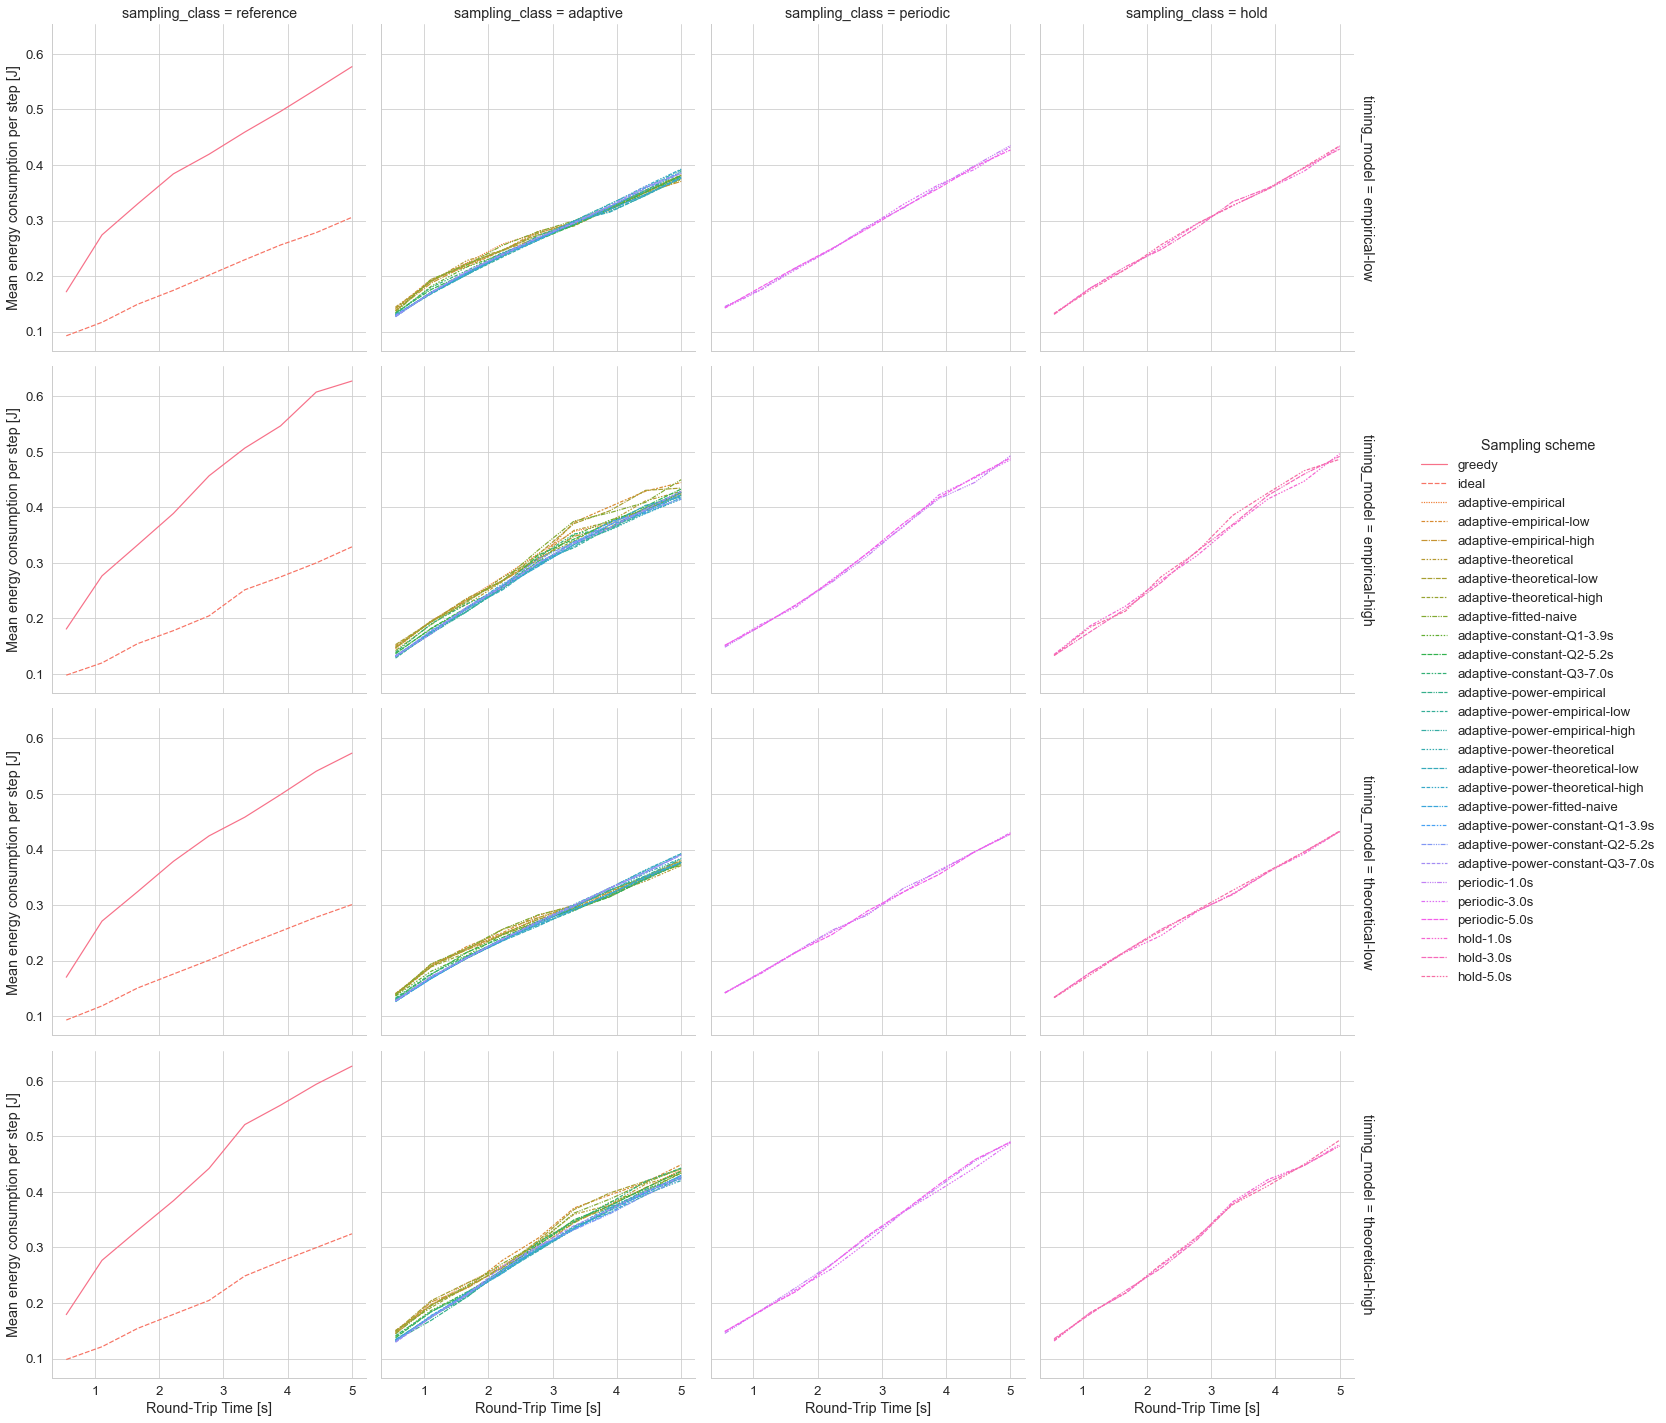

In [6]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="energy",
    hue="sampling_scheme",
    row="timing_model",
    col="sampling_class",
    errorbar=None,
    facet_kws={"margin_titles": True},
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean energy consumption per step [J]")
fg.legend.set_title("Sampling scheme")
# fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

In [7]:
adaptive_results = results[results["sampling_class"] == "adaptive"].copy()
adaptive_results["sampling_scheme"] = adaptive_results["sampling_scheme"].cat.remove_unused_categories()
adaptive_results["opt-objective"] = "ttf"
adaptive_results.loc[adaptive_results["sampling_scheme"].str.contains("power"), "opt-objective"] = "energy"
adaptive_results["opt-objective"] = adaptive_results["opt-objective"].astype("category")
adaptive_results["sampling_scheme"] = adaptive_results["sampling_scheme"].astype(str)
adaptive_results.loc[adaptive_results["opt-objective"] == "ttf", "sampling_scheme"] = adaptive_results[adaptive_results["opt-objective"] == "ttf"]["sampling_scheme"].apply(lambda s: "-".join(s.split("-")[1:]))
adaptive_results.loc[adaptive_results["opt-objective"] == "energy", "sampling_scheme"] = adaptive_results[adaptive_results["opt-objective"] == "energy"]["sampling_scheme"].apply(lambda s: "-".join(s.split("-")[2:]))
adaptive_results["sampling_scheme"] = adaptive_results["sampling_scheme"].astype("category")
adaptive_results["sampling_class"] = (
    adaptive_results["sampling_scheme"].apply(
        lambda e: "realistic" if e.startswith("empirical") or e.startswith("theoretical") else "reference"
    )
)
adaptive_results = adaptive_results[adaptive_results["timing_model"] != "fitted-naive"].copy()
adaptive_results["timing_model"] = adaptive_results["timing_model"].cat.remove_unused_categories()
adaptive_results

,rtt,step,previous_ttf,execution_time,step_duration,ttf,wait_time,samples,cumulative_duration,cumulative_samples,repetition,energy,cumulative_energy,timing_model,sampling_scheme,sampling_class,opt-objective
0,0.555556,1,0.555556,4.767165,5.791625,1.024460,0.468905,7,5.791625,7,5,0.140541,0.140541,empirical-high,constant-Q1-3.9s,reference,ttf
1,0.555556,2,1.024460,5.158513,5.782207,0.623695,0.068139,6,11.573832,13,5,0.132733,0.273274,empirical-high,constant-Q1-3.9s,reference,ttf
2,0.555556,3,0.623695,3.749709,4.757540,1.007832,0.452276,4,16.331373,17,5,0.102030,0.375304,empirical-high,constant-Q1-3.9s,reference,ttf
3,0.555556,4,1.007832,6.452050,7.099829,0.647779,0.092223,7,23.431201,24,5,0.160164,0.535468,empirical-high,constant-Q1-3.9s,reference,ttf
4,0.555556,5,0.647779,4.665980,5.748320,1.082340,0.526785,5,29.179521,29,5,0.124558,0.660026,empirical-high,constant-Q1-3.9s,reference,ttf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403995,1.666667,96,2.436525,2.215441,6.425687,4.210245,2.543579,1,871.872796,246,4,0.137385,23.164092,theoretical-low,theoretical,realistic,ttf
1403996,1.666667,97,4.210245,4.449116,6.594597,2.145481,0.478814,1,878.467393,247,4,0.139919,23.304011,theoretical-low,theoretical,realistic,ttf
1403997,1.666667,98,2.145481,3.897905,6.469932,2.572027,0.905360,1,884.937325,248,4,0.138049,23.442060,theoretical-low,theoretical,realistic,ttf
1403998,1.666667,99,2.572027,4.946722,6.770898,1.824176,0.157509,1,891.708223,249,4,0.142563,23.584623,theoretical-low,theoretical,realistic,ttf


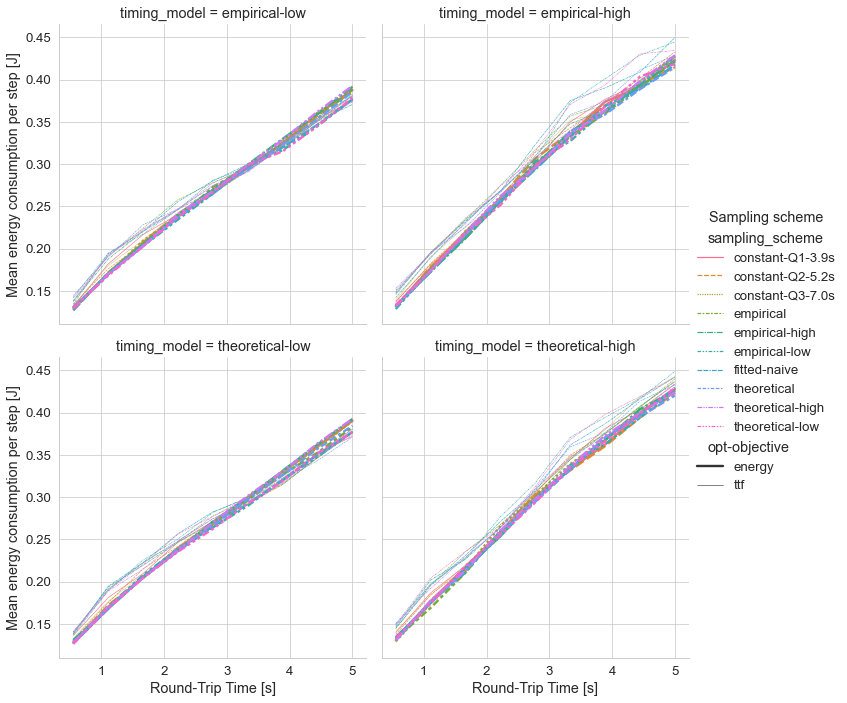

In [14]:
fg = sns.relplot(
    kind="line",
    data=adaptive_results,
    x="rtt",
    y="energy",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=2,
    # col="sampling_class",
    errorbar=None,
    facet_kws={"margin_titles": True},
    style="sampling_scheme",
    size="opt-objective"
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean energy consumption per step [J]")
fg.legend.set_title("Sampling scheme")
# fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

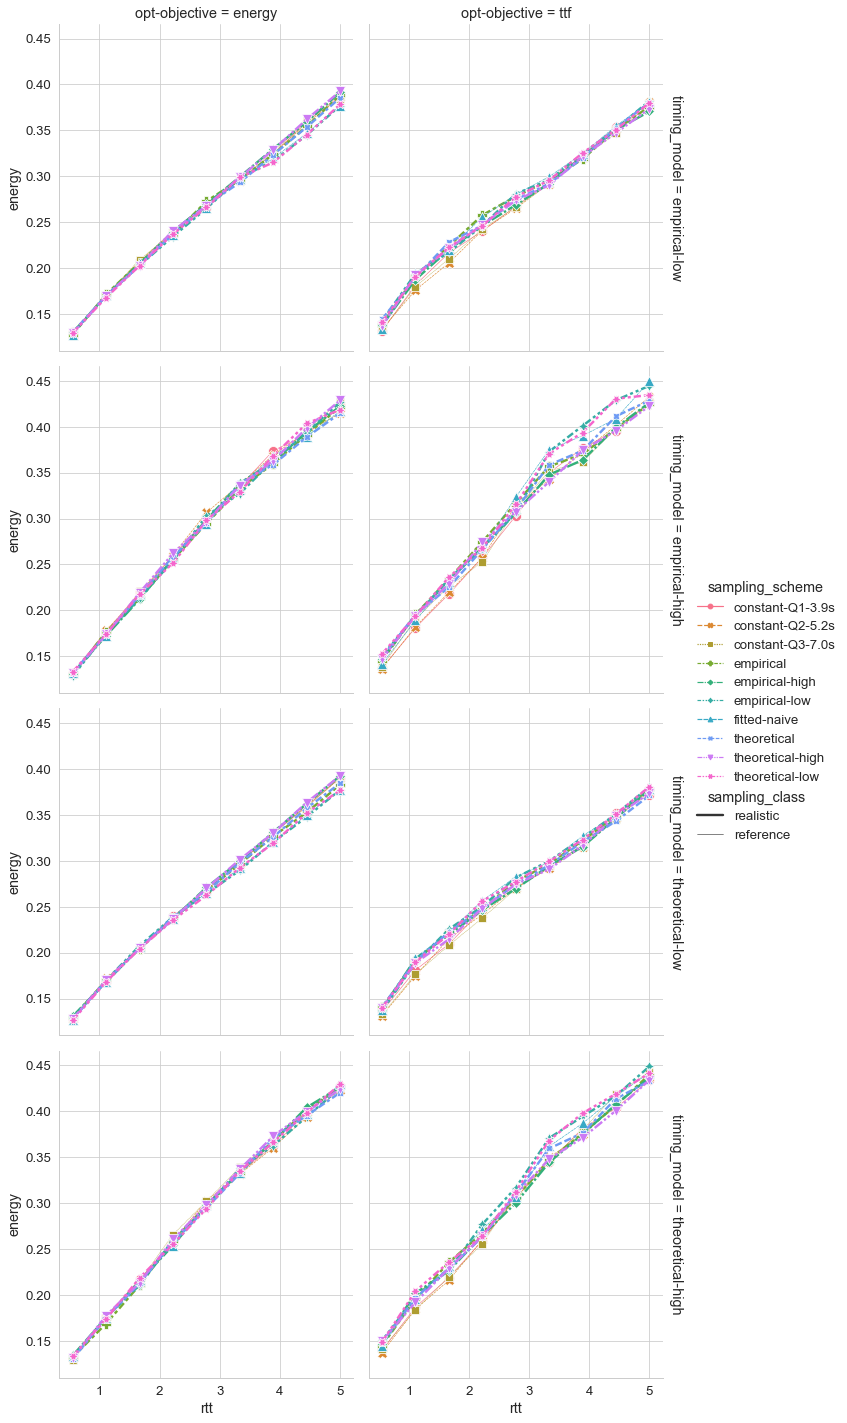

In [9]:
fg = sns.relplot(
    kind="line",
    errorbar=None,
    data=adaptive_results,
    x="rtt",
    y="energy",
    row="timing_model",
    col="opt-objective",
    hue="sampling_scheme",
    style="sampling_scheme",
    size="sampling_class",
    size_order=["realistic", "reference"],
    markers=True,
    markersize=10,
    facet_kws={"margin_titles": True}
)

plt.show()

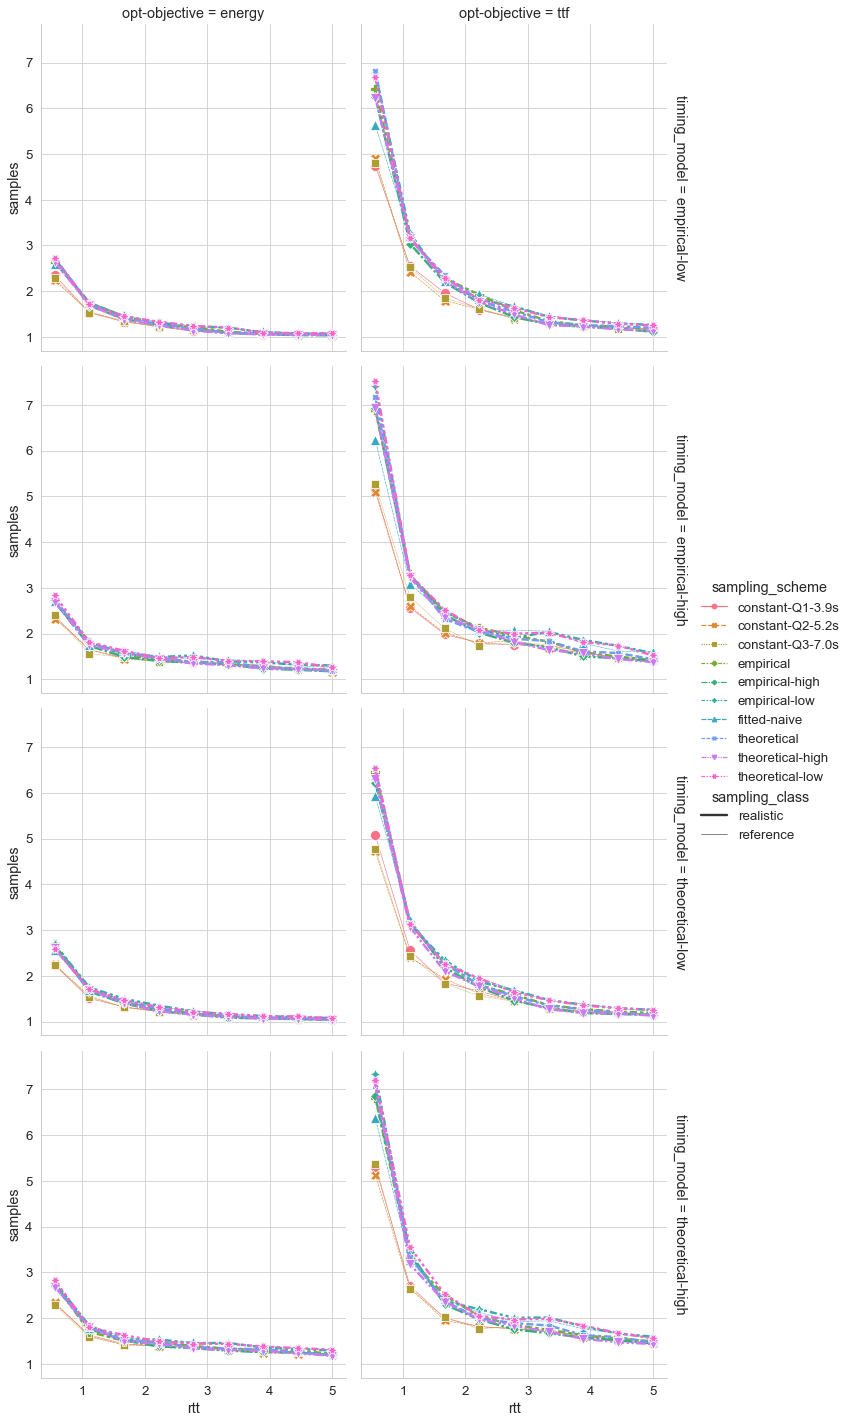

In [10]:
fg = sns.relplot(
    kind="line",
    errorbar=None,
    data=adaptive_results,
    x="rtt",
    y="samples",
    row="timing_model",
    col="opt-objective",
    hue="sampling_scheme",
    style="sampling_scheme",
    size="sampling_class",
    size_order=["realistic", "reference"],
    markers=True,
    markersize=10,
    facet_kws={"margin_titles": True}
)
plt.show()

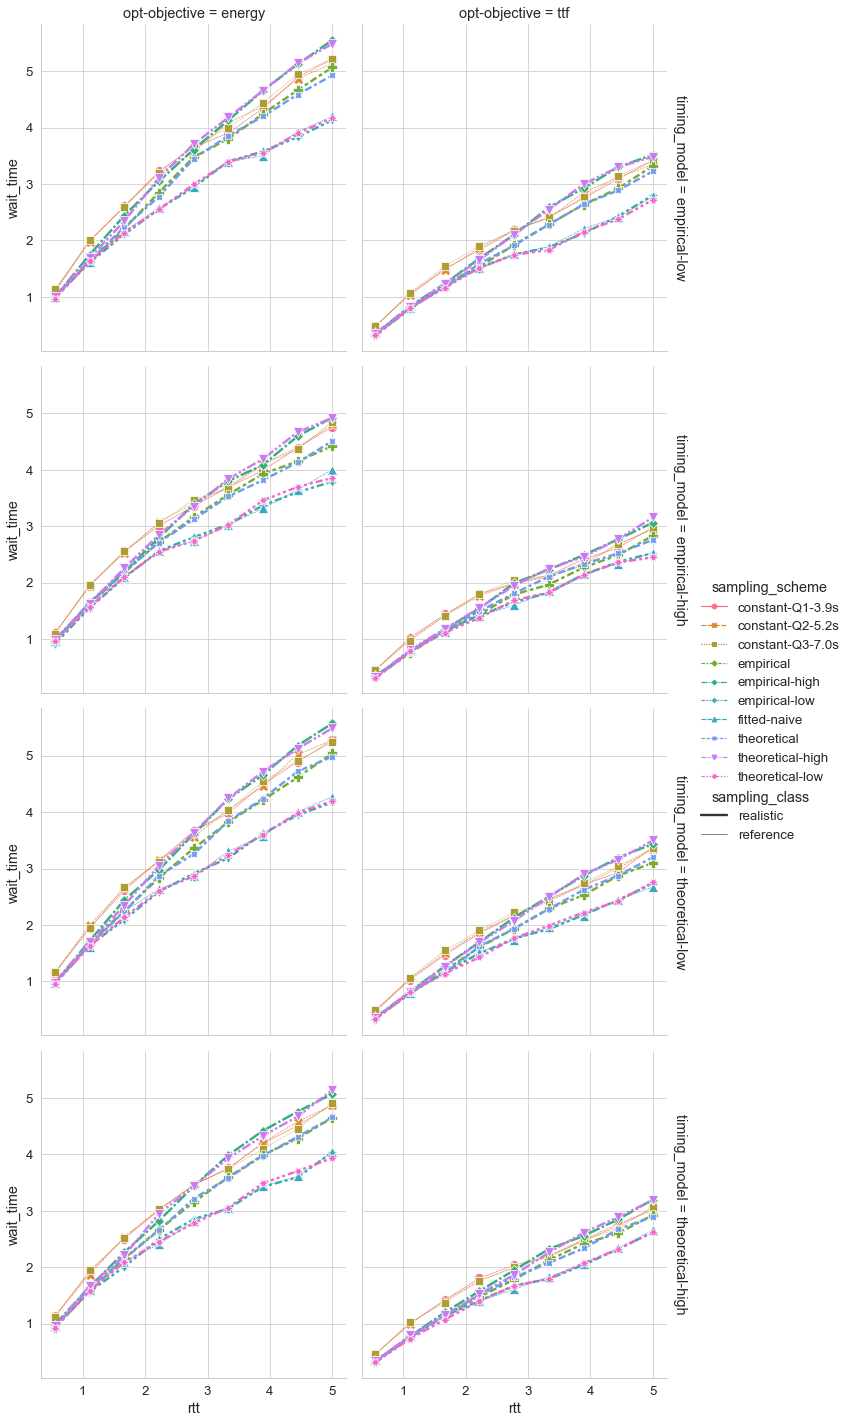

In [11]:
fg = sns.relplot(
    kind="line",
    errorbar=None,
    data=adaptive_results,
    x="rtt",
    y="wait_time",
    row="timing_model",
    col="opt-objective",
    hue="sampling_scheme",
    style="sampling_scheme",
    size="sampling_class",
    size_order=["realistic", "reference"],
    markers=True,
    markersize=10,
    facet_kws={"margin_titles": True}
)
plt.show()

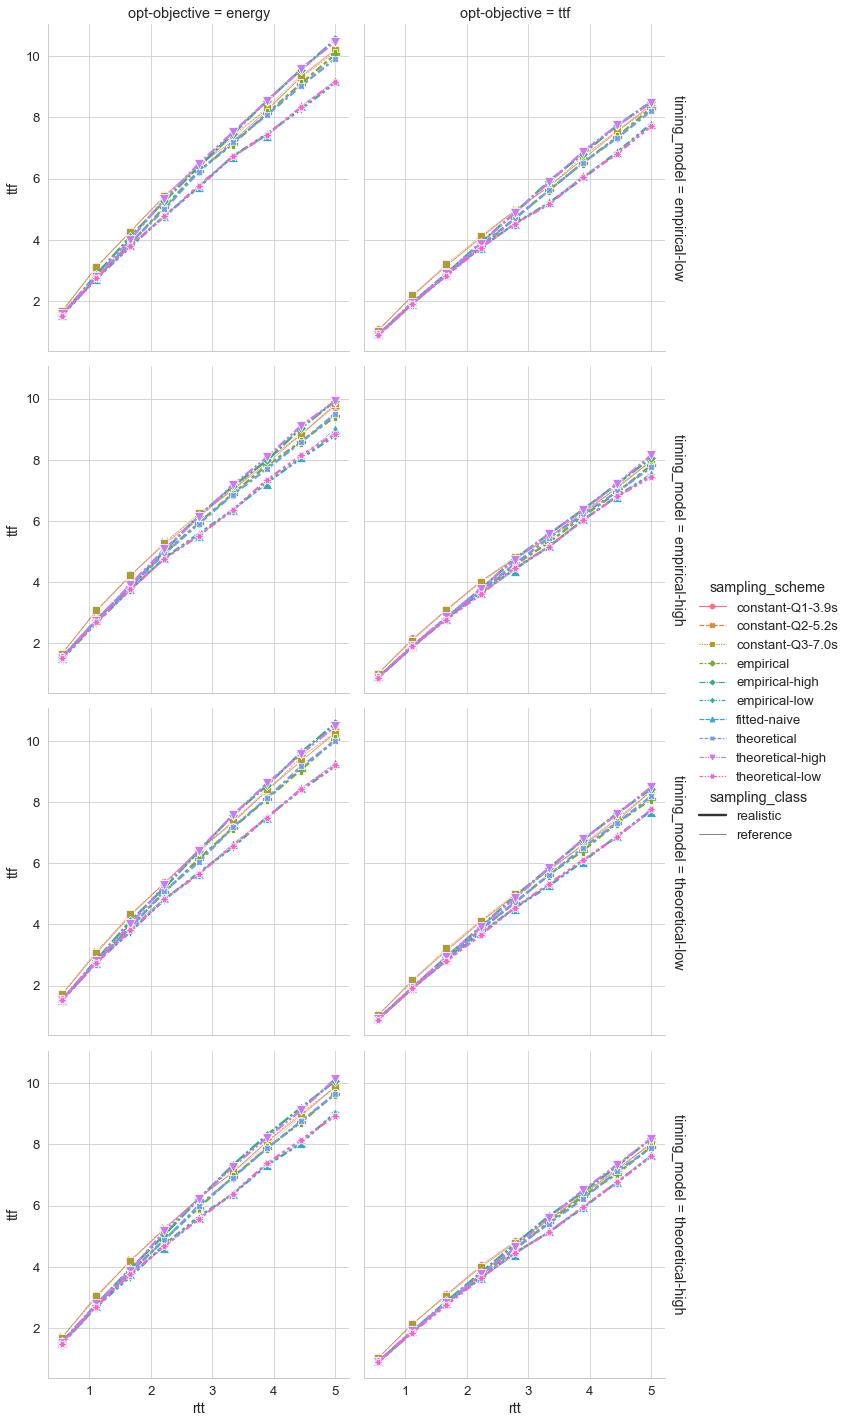

In [12]:
fg = sns.relplot(
    kind="line",
    errorbar=None,
    data=adaptive_results,
    x="rtt",
    y="ttf",
    row="timing_model",
    col="opt-objective",
    hue="sampling_scheme",
    style="sampling_scheme",
    size="sampling_class",
    size_order=["realistic", "reference"],
    markers=True,
    markersize=10,
    facet_kws={"margin_titles": True}
)
plt.show()

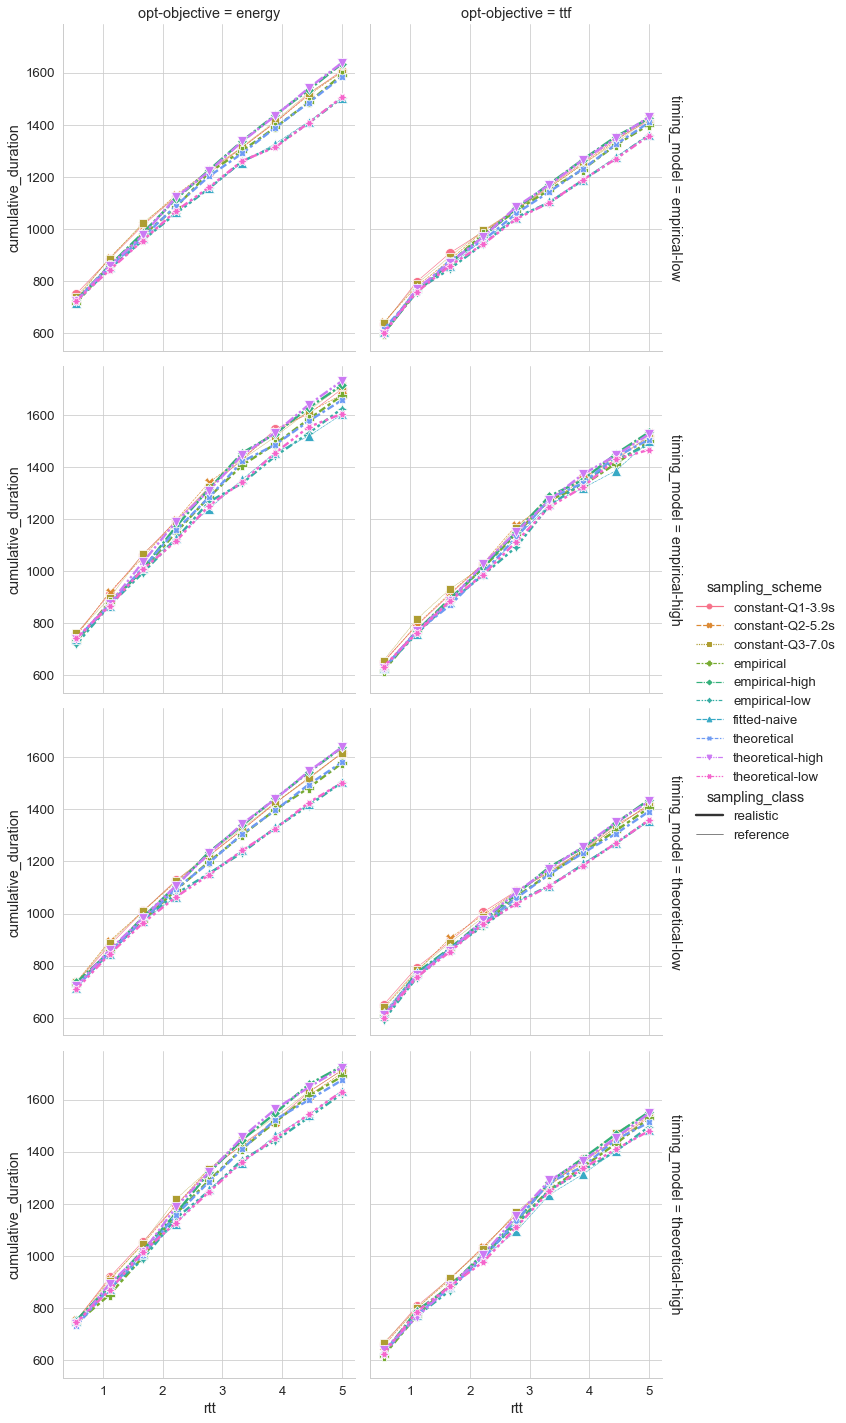

In [13]:
fg = sns.relplot(
    kind="line",
    errorbar=None,
    data=adaptive_results[adaptive_results["step"] == adaptive_results["step"].max()],
    x="rtt",
    y="cumulative_duration",
    row="timing_model",
    col="opt-objective",
    hue="sampling_scheme",
    style="sampling_scheme",
    size="sampling_class",
    size_order=["realistic", "reference"],
    markers=True,
    markersize=10,
    facet_kws={"margin_titles": True}
)
plt.show()